In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [10]:
data = pd.read_csv('..\\data\\analysis_dataset_w_material.csv', sep=";")
#data = data.dropna()

In [5]:
data.describe()

,Unnamed: 0,coin,maxdiam,mindiam,weight,enddate,startdate,axis,material_cat,denom_cat,mint_cat,collection_cat
count,41088.000000,41088.000000,30922.000000,18346.000000,35366.000000,33315.000000,33313.000000,14259.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20543.500000,21142.086059,21.386768,21.719087,8.112168,-28.796578,-62.587368,7.692124,0.325010,8.664841,54.068925,16862.048214
std,11861.228267,12116.136137,7.215579,6.903560,6.994401,255.008532,269.713119,3.838462,0.770843,15.184772,33.342372,11581.499771
min,0.000000,41.000000,0.700000,0.700000,0.000000,-550.000000,-600.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,10271.750000,10791.750000,16.000000,16.800000,2.980000,-300.000000,-350.000000,6.000000,0.000000,-1.000000,24.000000,6408.750000
50%,20543.500000,21199.500000,20.400000,21.000000,5.870000,65.000000,41.000000,7.000000,0.000000,1.000000,62.000000,16680.500000
75%,30815.250000,31616.250000,26.900000,26.600000,12.030000,211.000000,197.000000,12.000000,1.000000,14.000000,83.000000,26952.250000
max,41087.000000,42084.000000,60.000000,47.000000,93.340000,425.000000,320.000000,13.000000,5.000000,51.000000,115.000000,37224.000000


In [11]:
del data["mindiam"]
del data["findspot"]
del data["axis"]
del data["Unnamed: 0"]
data["material"] = data["material"].astype("category")
data["material"] = data["material"].cat.codes
coins = data["coin"].to_list()
scaled_data = StandardScaler().fit_transform(data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data["coin"] = coins
scaled_data = scaled_data.dropna()
coins = scaled_data["coin"]
del scaled_data["coin"]
data.shape

(41088, 10)

In [12]:
for c in data.columns:
    try:
        data[c] = data[c].astype(float)
    except:
        print(c)

c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


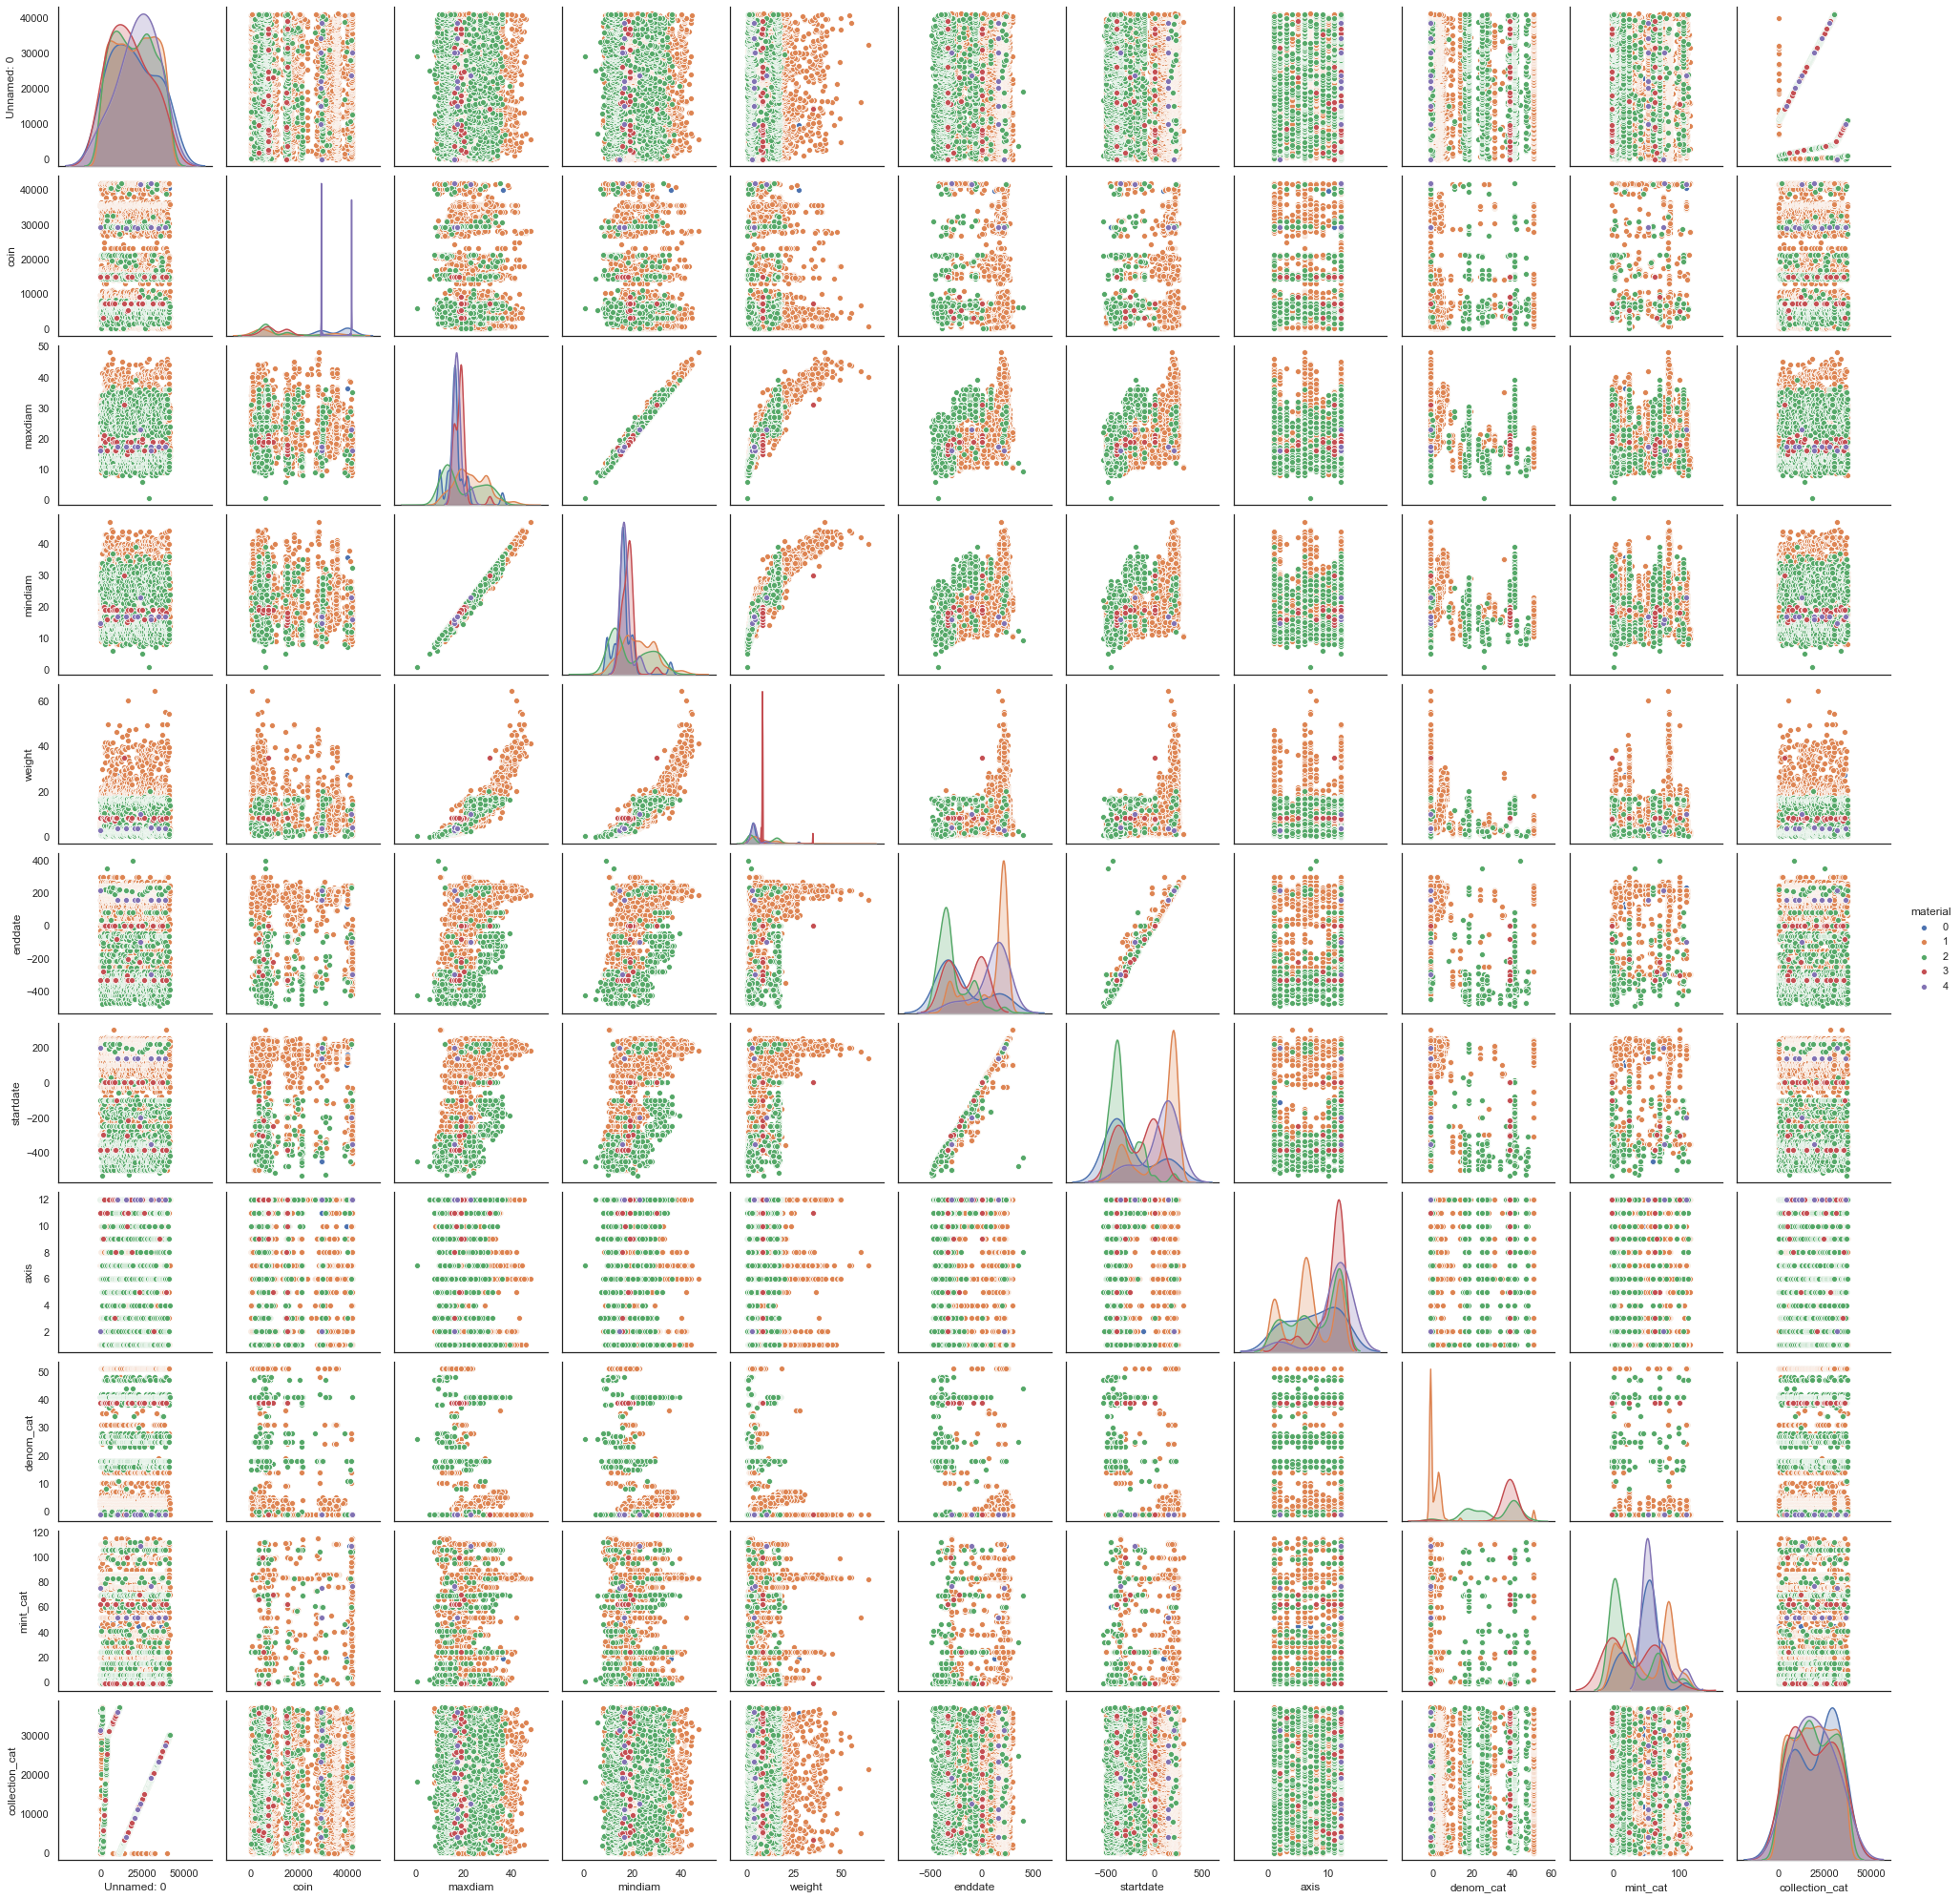

In [7]:
sns.pairplot(data, hue='material')

In [13]:
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(24227, 2)

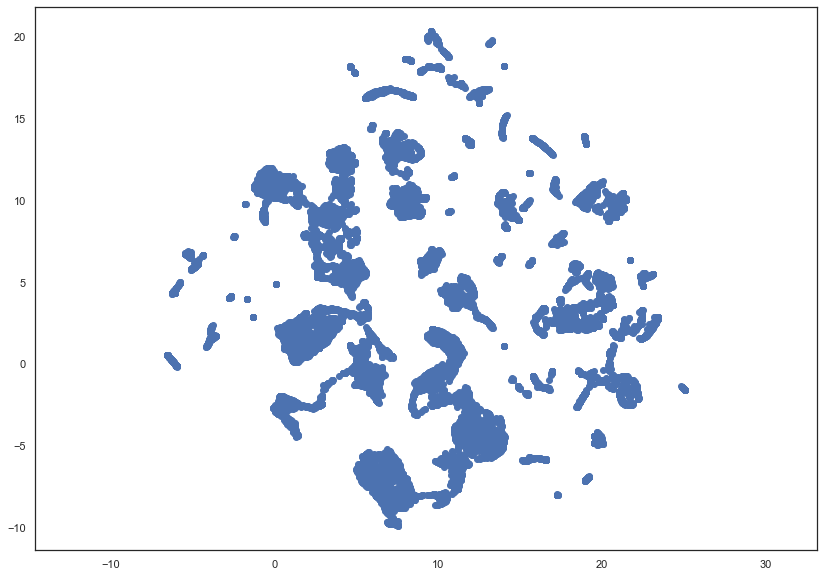

In [14]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')

In [15]:
#test
for i in range(10):
    reducer2 = umap.UMAP(random_state=i)
    reducer2.fit(scaled_data)
    embedding2 = reducer2.transform(scaled_data)
    plt.scatter(
        embedding2[:, 0],
        embedding2[:, 1])
    plt.gca().set_aspect('equal', 'datalim')
    plt.show()

KeyboardInterrupt: 

In [19]:
import random
def cross_validation(d, k=40):
    seeds = random.sample(range(0, 100000), k)
    embedding_x = 0
    embedding_y = 0
    for seed in seeds:
        r = umap.UMAP(random_state=seed)
        r.fit(d)
        embedding = r.transform(d)
        embedding_x += embedding[:, 0]
        embedding_y += embedding[:, 1]
    embedding_x = embedding_x / k
    embedding_y = embedding_y / k
    return embedding_x, embedding_y

x, y = cross_validation(scaled_data)

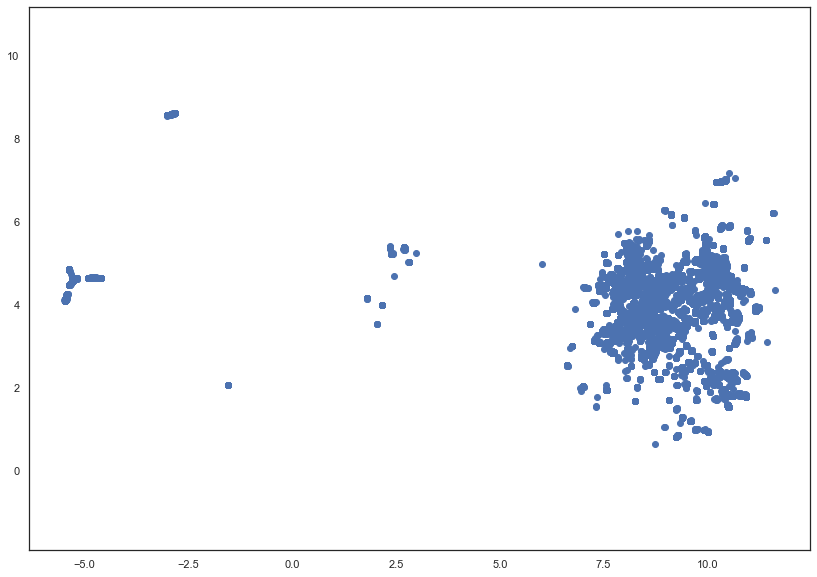

In [20]:
plt.scatter(
        x,
        y)
plt.gca().set_aspect('equal', 'datalim')
data_umap = pd.DataFrame({"x": x, "y": y})

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(data_umap)

In [22]:
data_umap["labels"] = kmeans.labels_

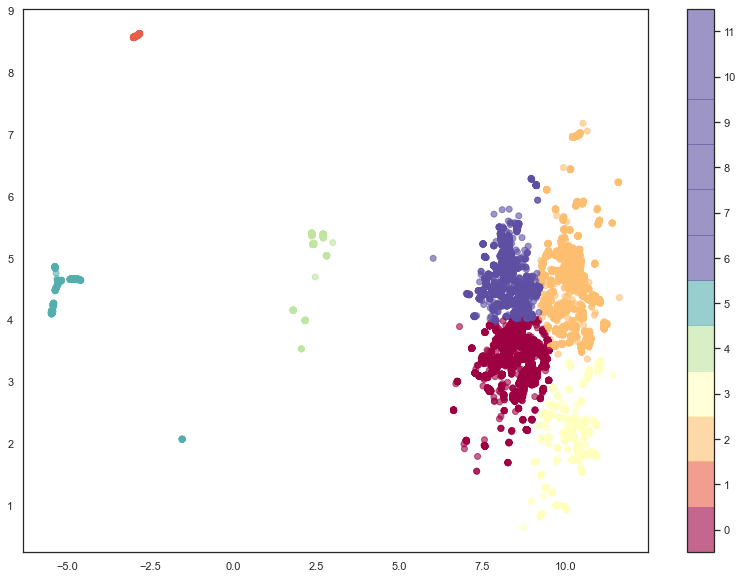

In [23]:
plt.scatter( data_umap["x"], data_umap["y"], c=data_umap["labels"], alpha=0.6, cmap='Spectral')
plt.colorbar(boundaries=np.arange(13)-0.5).set_ticks(np.arange(13))

In [35]:
#joining design data
data = pd.read_csv('..\\data\\analysis_dataset.csv', sep=";")
data = data.dropna()
del data["findspot"]
coins = data["coin"].to_list()
for c in data.columns:
    try:
        data[c] = data[c].astype(float)
    except:
        print(c)
del data["coin"]
scaled_data = StandardScaler().fit_transform(data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data["coin"] = coins
design_data = pd.read_csv("..\\2021_06_01_DC_NLP_CNT\\design_dummys.csv", sep=";")
complete_data = pd.merge(scaled_data, design_data, how="left", left_on="coin", right_on="id_coin")

In [36]:
del complete_data["coin"]
complete_data = complete_data.dropna()
complete_data.shape

(5168, 588)

In [37]:
r2 = umap.UMAP(random_state=42)
r2.fit(complete_data)
embedding = r2.transform(complete_data)

c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


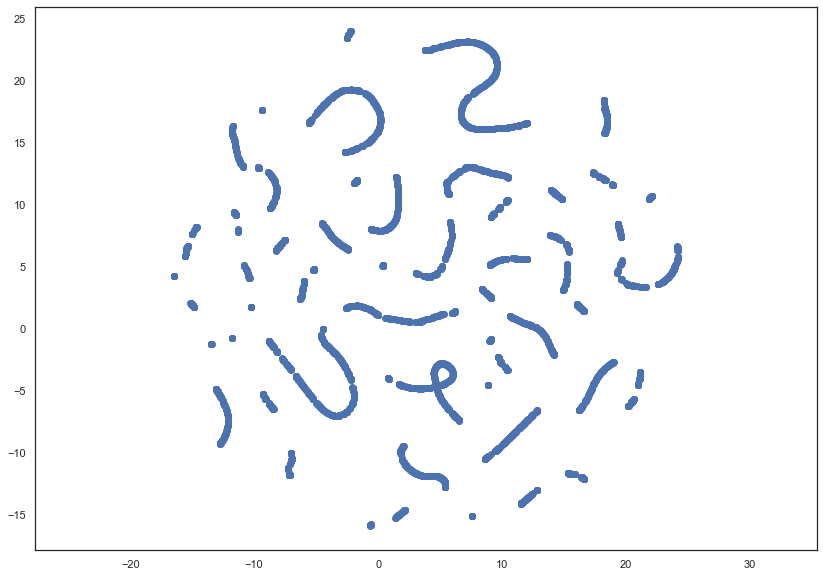

In [38]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')